In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
import plotly.express as px
from scipy.stats import kurtosis

In [109]:
from pychangepoints import cython_pelt, algo_changepoints
import tsfresh

In [159]:
penalty_value_list = [1,10,30,50]
min_segment_size = 5
model = 'mbic_nonparametric_ed'
nquantiles = 10

In [160]:
def compute_regression(x,y):
    slope, intercept, r_value, p_value, std_err = stats.linregress(x.index,x.GR)
    x['slope_'+str(y)] = slope
    #quantiles = x.GR.quantile([0.1,0.9]).values
    #x['quantile_10_'+str(y)] = quantiles[0]
    #x['quantile_90_'+str(y)] = quantiles[1]
    x['position_'+str(y)] = np.arange(len(x))/len(x)
    x['energy_'+str(y)] =tsfresh.feature_extraction.feature_calculators.abs_energy(x.GR.values)
    x['change_'+str(y)] =tsfresh.feature_extraction.feature_calculators.absolute_sum_of_changes(x.GR.values)
    return x

In [2]:
data = pd.read_csv('train_lofi_rowid_Nov13.csv')

In [3]:
data.shape

(4400000, 4)

In [162]:
from tsfresh import extract_features


In [163]:
list_well = []
for well_id in data.well_id.unique()[:120]:
    print(well_id)
    data_well = data[data.well_id==well_id]
    data_well.reset_index(inplace=True)

    for penalty_value in  penalty_value_list:
        list_cpts, nb_cpts = algo_changepoints.np_pelt(data_well[['GR']], penalty_value, min_segment_size, nquantiles, method = model)
        list_cpts_all = np.append(list_cpts,0)[::-1]

        data_well['seg_'+str(penalty_value)]=0
        for j in range(nb_cpts):
            data_well.loc[list_cpts_all[j]:list_cpts_all[j+1],'seg_'+str(penalty_value)]=j
        data_well['GR_mean_'+str(penalty_value)]=data_well.groupby('seg_'+str(penalty_value)).transform('mean')['GR']
        data_well['GR_std_'+str(penalty_value)]=data_well.groupby('seg_'+str(penalty_value)).transform('std')['GR']
        data_well['GR_skew_'+str(penalty_value)]=data_well.groupby('seg_'+str(penalty_value)).transform('skew')['GR']
        data_well['GR_kurtosis_'+str(penalty_value)]=data_well.groupby('seg_'+str(penalty_value)).transform(kurtosis)['GR']
        data_well['GR_max_'+str(penalty_value)]=data_well.groupby('seg_'+str(penalty_value)).transform('max')['GR']
        data_well['GR_min_'+str(penalty_value)]=data_well.groupby('seg_'+str(penalty_value)).transform('min')['GR']

        data_well = data_well.groupby('seg_'+str(penalty_value)).apply(lambda x:compute_regression(x,penalty_value))
    list_well.append(data_well)

0


C:\Users\brunedv\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\brunedv\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\brunedv\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119


In [164]:
data_well.columns

Index(['index', 'row_id', 'well_id', 'GR', 'label', 'seg_1', 'GR_mean_1',
       'GR_std_1', 'GR_skew_1', 'GR_kurtosis_1', 'GR_max_1', 'GR_min_1',
       'slope_1', 'position_1', 'energy_1', 'change_1', 'seg_10', 'GR_mean_10',
       'GR_std_10', 'GR_skew_10', 'GR_kurtosis_10', 'GR_max_10', 'GR_min_10',
       'slope_10', 'position_10', 'energy_10', 'change_10', 'seg_30',
       'GR_mean_30', 'GR_std_30', 'GR_skew_30', 'GR_kurtosis_30', 'GR_max_30',
       'GR_min_30', 'slope_30', 'position_30', 'energy_30', 'change_30',
       'seg_50', 'GR_mean_50', 'GR_std_50', 'GR_skew_50', 'GR_kurtosis_50',
       'GR_max_50', 'GR_min_50', 'slope_50', 'position_50', 'energy_50',
       'change_50'],
      dtype='object')

In [165]:
data_transform = pd.concat(list_well[:100],ignore_index=True)
data_transform_test = pd.concat(list_well[100:],ignore_index=True)

In [166]:
pd.concat(list_well)

,index,row_id,well_id,GR,label,seg_1,GR_mean_1,GR_std_1,GR_skew_1,GR_kurtosis_1,...,GR_mean_50,GR_std_50,GR_skew_50,GR_kurtosis_50,GR_max_50,GR_min_50,slope_50,position_50,energy_50,change_50
0,0,0,0,99.005617,0,0,105.105553,5.513724,0.800581,-0.786389,...,106.092630,5.417415,-0.682459,1.037903,117.577372,90.687814,0.077038,0.000000,4.062305e+05,188.548431
1,1,1,0,105.563944,0,0,105.105553,5.513724,0.800581,-0.786389,...,106.092630,5.417415,-0.682459,1.037903,117.577372,90.687814,0.077038,0.027778,4.062305e+05,188.548431
2,2,2,0,105.921065,0,0,105.105553,5.513724,0.800581,-0.786389,...,106.092630,5.417415,-0.682459,1.037903,117.577372,90.687814,0.077038,0.055556,4.062305e+05,188.548431
3,3,3,0,113.513354,0,0,105.105553,5.513724,0.800581,-0.786389,...,106.092630,5.417415,-0.682459,1.037903,117.577372,90.687814,0.077038,0.083333,4.062305e+05,188.548431
4,4,4,0,101.523783,0,0,105.105553,5.513724,0.800581,-0.786389,...,106.092630,5.417415,-0.682459,1.037903,117.577372,90.687814,0.077038,0.111111,4.062305e+05,188.548431
5,5,5,0,94.464482,0,1,103.171420,5.408107,-0.786455,-0.988269,...,106.092630,5.417415,-0.682459,1.037903,117.577372,90.687814,0.077038,0.138889,4.062305e+05,188.548431
6,6,6,0,103.864994,0,1,103.171420,5.408107,-0.786455,-0.988269,...,106.092630,5.417415,-0.682459,1.037903,117.577372,90.687814,0.077038,0.166667,4.062305e+05,188.548431
7,7,7,0,104.410065,0,1,103.171420,5.408107,-0.786455,-0.988269,...,106.092630,5.417415,-0.682459,1.037903,117.577372,90.687814,0.077038,0.194444,4.062305e+05,188.548431
8,8,8,0,95.934506,0,1,103.171420,5.408107,-0.786455,-0.988269,...,106.092630,5.417415,-0.682459,1.037903,117.577372,90.687814,0.077038,0.222222,4.062305e+05,188.548431
9,9,9,0,107.290773,0,1,103.171420,5.408107,-0.786455,-0.988269,...,106.092630,5.417415,-0.682459,1.037903,117.577372,90.687814,0.077038,0.250000,4.062305e+05,188.548431


In [167]:
data_transform_test.shape,data_transform.shape

((22000, 49), (110000, 49))

In [168]:
data_transform.to_csv('data_challenge.csv')

In [169]:
data_transform_test.to_csv('data_challenge_test.csv')

In [170]:
data_transform['label'] = data_transform['label'].astype('category')

In [171]:
import lightgbm as lgb

In [172]:
from sklearn.preprocessing import StandardScaler

In [173]:
scaler = StandardScaler()

In [174]:
data_transform.columns[5:]

Index(['seg_1', 'GR_mean_1', 'GR_std_1', 'GR_skew_1', 'GR_kurtosis_1',
       'GR_max_1', 'GR_min_1', 'slope_1', 'position_1', 'energy_1', 'change_1',
       'seg_10', 'GR_mean_10', 'GR_std_10', 'GR_skew_10', 'GR_kurtosis_10',
       'GR_max_10', 'GR_min_10', 'slope_10', 'position_10', 'energy_10',
       'change_10', 'seg_30', 'GR_mean_30', 'GR_std_30', 'GR_skew_30',
       'GR_kurtosis_30', 'GR_max_30', 'GR_min_30', 'slope_30', 'position_30',
       'energy_30', 'change_30', 'seg_50', 'GR_mean_50', 'GR_std_50',
       'GR_skew_50', 'GR_kurtosis_50', 'GR_max_50', 'GR_min_50', 'slope_50',
       'position_50', 'energy_50', 'change_50'],
      dtype='object')

In [175]:
list_interest = []
list_interest_base = ['slope','GR_mean','GR_std','GR_skew','GR_kurtosis','GR_max','GR_min','position','energy','change']
for j in penalty_value_list:
    for h in list_interest_base:
        list_interest.append(h+'_'+str(j))
    
list_interest =  list_interest+['GR']



In [176]:
list_interest

['slope_1',
 'GR_mean_1',
 'GR_std_1',
 'GR_skew_1',
 'GR_kurtosis_1',
 'GR_max_1',
 'GR_min_1',
 'position_1',
 'energy_1',
 'change_1',
 'slope_10',
 'GR_mean_10',
 'GR_std_10',
 'GR_skew_10',
 'GR_kurtosis_10',
 'GR_max_10',
 'GR_min_10',
 'position_10',
 'energy_10',
 'change_10',
 'slope_30',
 'GR_mean_30',
 'GR_std_30',
 'GR_skew_30',
 'GR_kurtosis_30',
 'GR_max_30',
 'GR_min_30',
 'position_30',
 'energy_30',
 'change_30',
 'slope_50',
 'GR_mean_50',
 'GR_std_50',
 'GR_skew_50',
 'GR_kurtosis_50',
 'GR_max_50',
 'GR_min_50',
 'position_50',
 'energy_50',
 'change_50',
 'GR']

In [177]:
#X = scaler.transform(data_transform[list_interest])
X = data_transform[list_interest].values

y = data_transform['label'].astype(int).values

In [178]:
from sklearn.model_selection import train_test_split

In [179]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [180]:
X_train

array([[ 6.15212196e-01,  1.24674871e+02,  4.87196510e+00, ...,
         4.14178678e+06,  1.79084642e+03,  1.23585996e+02],
       [-1.68339154e+00,  1.21348483e+02,  3.60341722e+00, ...,
         1.82519309e+06,  7.13314680e+02,  1.17702416e+02],
       [ 6.56695060e-01,  8.61630361e+01,  6.91976608e+00, ...,
         4.51904653e+05,  2.35277452e+02,  9.07744802e+01],
       ...,
       [ 2.38263151e+00,  6.80829179e+01,  1.13706825e+01, ...,
         2.55869156e+05,  4.81248499e+02,  7.19930428e+01],
       [-8.71020452e-01,  8.51996339e+01,  8.81747585e+00, ...,
         8.28990116e+05,  6.42557916e+02,  8.83538871e+01],
       [ 2.76195908e+00,  4.22195147e+01,  7.28376276e+00, ...,
         5.59580978e+05,  8.50498460e+02,  4.62942157e+01]])

In [183]:
#X_new = scaler.transform(data_transform_test[list_interest])
X_new = data_transform_test[list_interest].values
y_new = data_transform_test['label'].values

In [184]:
from imblearn.under_sampling import RandomUnderSampler

In [185]:
rus = RandomUnderSampler(random_state=0)

In [186]:
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

C:\Users\brunedv\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



In [187]:
X_resampled.shape, np.bincount(y_resampled)

((39620, 41), array([7924, 7924, 7924, 7924, 7924], dtype=int64))

In [188]:
X_train_final, X_val, y_train_final, y_val = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


In [189]:
from sklearn.metrics import balanced_accuracy_score, accuracy_score,classification_report

In [239]:
params = {
          "objective" : "multiclass",
          "num_class" : 5,
          "num_leaves" : 20,
          "max_depth": -1,
          "learning_rate" : 0.05,
          "bagging_fraction" : 0.9,  # subsample
          "feature_fraction" : 0.9,  # colsample_bytree
          "bagging_freq" : 5,        # subsample_freq
          "bagging_seed" : 2018,
          "verbosity" : -1 }


lgtrain, lgval = lgb.Dataset(X_train_final, y_train_final), lgb.Dataset(X_new, y_new)
lgbmodel = lgb.train(params, lgtrain, 30000, valid_sets=[lgtrain, lgval], early_stopping_rounds=200,verbose_eval=200)


Training until validation scores don't improve for 200 rounds
[200]	training's multi_logloss: 0.152209	valid_1's multi_logloss: 0.287904
[400]	training's multi_logloss: 0.0734388	valid_1's multi_logloss: 0.282693
[600]	training's multi_logloss: 0.0395938	valid_1's multi_logloss: 0.284183
Early stopping, best iteration is:
[522]	training's multi_logloss: 0.0501751	valid_1's multi_logloss: 0.281175


In [245]:
X_new.mean(axis=0)/X_train_final.mean(axis=0)

array([ 0.1810135 ,  1.17178723,  0.82233097,  0.41925446,  1.22865484,
        1.11523696,  1.23521432,  0.98856645,  1.09601878,  0.82019198,
       -0.09493405,  1.16941117,  0.8095718 , -0.94940405,  1.47993565,
        1.06748096,  1.15912118,  1.01886259,  2.10194429,  1.58226411,
       -0.18422025,  1.16343595,  0.78735438, -2.08030176,  1.56765874,
        1.03556516,  1.15019754,  1.01385712,  1.95540804,  1.47152964,
        0.30230126,  1.15293943,  0.77777993, -5.13948033,  1.69600301,
        1.02201287,  1.15695769,  1.01443298,  1.68161154,  1.28880691,
        1.18075235])

In [246]:
import xgboost as xgb
from xgboost import XGBClassifier

In [247]:
alg = XGBClassifier(learning_rate=0.1, n_estimators=200, max_depth=5,
                        min_child_weight=3, gamma=0.2, subsample=0.6, colsample_bytree=1.0,
                        objective='multi:softmax', num_class=5 ,nthread=4, scale_pos_weight=1, seed=7,n_jobs=6)

In [248]:
xgtrain = xgb.DMatrix(X_train_final, label=y_train_final)

In [249]:
xgb_param = alg.get_xgb_params()


In [250]:
cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=3,
                          early_stopping_rounds=100)

In [251]:
alg.set_params(n_estimators=cvresult.shape[0])


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1.0, gamma=0.2,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=3, missing=None, n_estimators=200, n_jobs=6,
              nthread=4, num_class=5, objective='multi:softmax', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=7,
              silent=None, subsample=0.6, verbosity=1)

In [252]:
alg.fit(X_train, y_train, eval_metric='auc')


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1.0, gamma=0.2,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=3, missing=None, n_estimators=200, n_jobs=6,
              nthread=4, num_class=5, objective='multi:softprob',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=7, silent=None, subsample=0.6, verbosity=1)

In [253]:
from sklearn.ensemble import RandomForestClassifier

In [254]:
clf = RandomForestClassifier(n_estimators=500, max_depth=17, random_state=0,n_jobs =-1)

In [255]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=17, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [256]:
pred_rf = clf.predict(X_new)

In [257]:
predictions = alg.predict(X_new)

In [258]:
predictions.shape

(22000,)

In [259]:
data_transform_test['label'].values.shape

(22000,)

In [260]:
predictions

array([0, 0, 0, ..., 0, 0, 0])

In [261]:
y_train_final,y_val

(array([0, 1, 4, ..., 4, 0, 1]), array([3, 3, 1, ..., 4, 0, 4]))

In [262]:
y

array([0, 0, 0, ..., 0, 0, 0])

In [263]:
type(y_val)

numpy.ndarray

In [264]:
y_pred = np.argmax(lgbmodel.predict(X_test),axis=1)

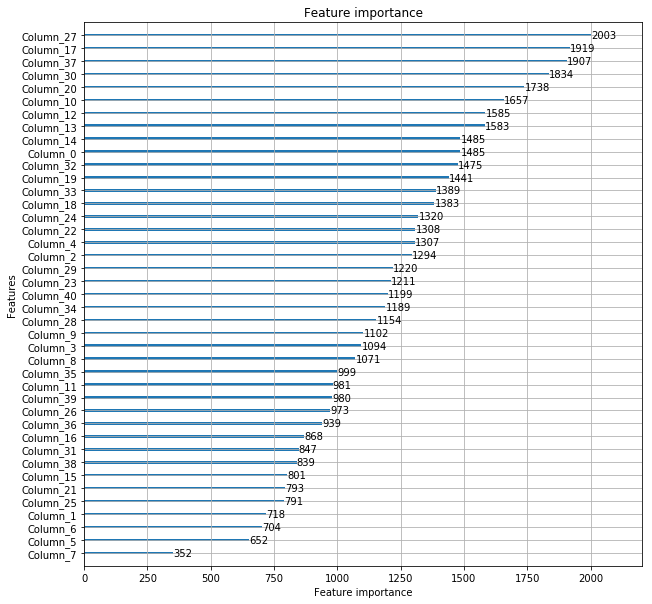

In [265]:
lgb.plot_importance(lgbmodel,figsize=(10,10))

In [266]:
list_interest[17]

'position_10'

In [267]:
from sklearn.metrics import confusion_matrix

In [268]:
confusion_matrix(y_test,y_pred)

array([[18556,   114,     0,   256,   259],
       [   50,  4049,    20,    70,    46],
       [    0,    21,  4345,    13,    26],
       [   48,    28,    21,  3779,    22],
       [   52,    38,    61,    30,  4396]], dtype=int64)

In [269]:
balanced_accuracy_score(y_test,y_pred)

0.9679198674488841

In [270]:
accuracy_score(y_test,y_pred)

0.9676308539944903

In [271]:
y_pred_val = np.argmax(lgbmodel.predict(X_val),axis=1)

In [272]:
print(classification_report(y_val,y_pred_val))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96      1639
           1       0.96      0.96      0.96      1546
           2       0.98      0.99      0.98      1557
           3       0.96      0.97      0.97      1625
           4       0.96      0.96      0.96      1557

    accuracy                           0.97      7924
   macro avg       0.97      0.97      0.97      7924
weighted avg       0.97      0.97      0.97      7924



In [273]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98     19185
           1       0.95      0.96      0.95      4235
           2       0.98      0.99      0.98      4405
           3       0.91      0.97      0.94      3898
           4       0.93      0.96      0.94      4577

    accuracy                           0.97     36300
   macro avg       0.95      0.97      0.96     36300
weighted avg       0.97      0.97      0.97     36300



In [274]:
y_pred_new = np.argmax(lgbmodel.predict(X_new),axis=1)

In [275]:
y_new_average = lgbmodel.predict(X_new)+alg.predict_proba(X_new)

In [276]:
y_new_mean = np.argmax(y_new_average,axis=1)

In [277]:
print(classification_report(data_transform_test['label'].values,pred_rf))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     12259
           1       0.74      0.84      0.79      2095
           2       0.95      0.92      0.93      3111
           3       0.84      0.71      0.77      2345
           4       0.89      0.76      0.82      2190

    accuracy                           0.91     22000
   macro avg       0.87      0.84      0.86     22000
weighted avg       0.91      0.91      0.91     22000



In [278]:
print(classification_report(data_transform_test['label'].values,y_pred_new))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96     12259
           1       0.72      0.85      0.78      2095
           2       0.94      0.92      0.93      3111
           3       0.77      0.75      0.76      2345
           4       0.80      0.79      0.79      2190

    accuracy                           0.90     22000
   macro avg       0.84      0.85      0.84     22000
weighted avg       0.90      0.90      0.90     22000



In [279]:
print(classification_report(data_transform_test['label'].values,predictions))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97     12259
           1       0.74      0.84      0.79      2095
           2       0.94      0.92      0.93      3111
           3       0.83      0.70      0.76      2345
           4       0.88      0.76      0.81      2190

    accuracy                           0.91     22000
   macro avg       0.87      0.84      0.85     22000
weighted avg       0.91      0.91      0.91     22000



In [280]:
print(classification_report(data_transform_test['label'].values,y_new_mean))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97     12259
           1       0.73      0.85      0.79      2095
           2       0.94      0.92      0.93      3111
           3       0.81      0.73      0.76      2345
           4       0.85      0.78      0.81      2190

    accuracy                           0.91     22000
   macro avg       0.86      0.85      0.85     22000
weighted avg       0.91      0.91      0.91     22000



In [227]:
accuracy_score(data_transform_test['label'].values,y_new_mean)

0.9070454545454546

In [228]:
accuracy_score(data_transform_test['label'].values,pred_rf)

0.9106818181818181

In [229]:
balanced_accuracy_score(data_transform_test['label'].values,pred_rf)

0.8433995812343504

In [230]:
confusion_matrix(data_transform_test['label'].values,pred_rf)

array([[12078,    49,     1,    64,    67],
       [   69,  1760,    25,   172,    69],
       [    0,   156,  2866,    45,    44],
       [  263,   271,   108,  1676,    27],
       [  324,   135,    30,    46,  1655]], dtype=int64)

In [231]:
confusion_matrix(data_transform_test['label'].values,y_new_mean)

array([[11920,    45,     0,   172,   122],
       [   30,  1787,    35,   182,    61],
       [    0,   149,  2869,    29,    64],
       [  184,   295,   132,  1686,    48],
       [  274,   164,    31,    28,  1693]], dtype=int64)

In [232]:
data_transform_test['label'].values.shape

(22000,)

In [233]:
data_transform_test['label_pred']= pred_rf
data_transform_test['label_pred_mean']= y_new_mean

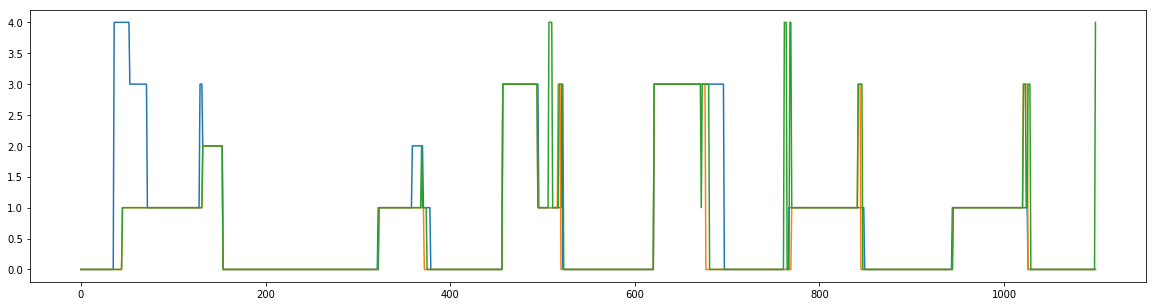

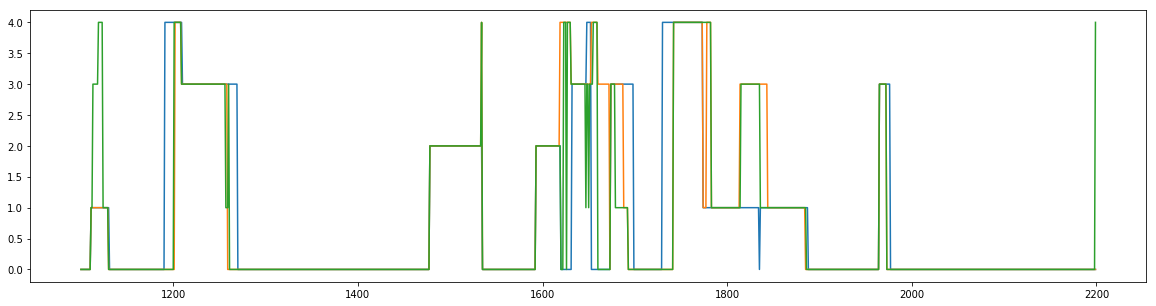

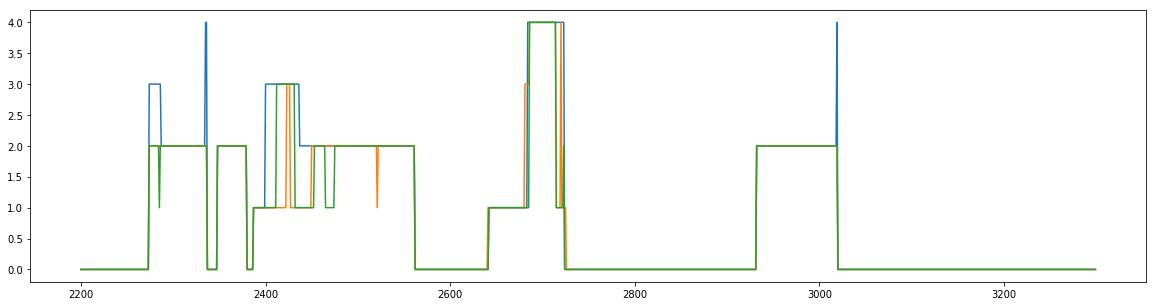

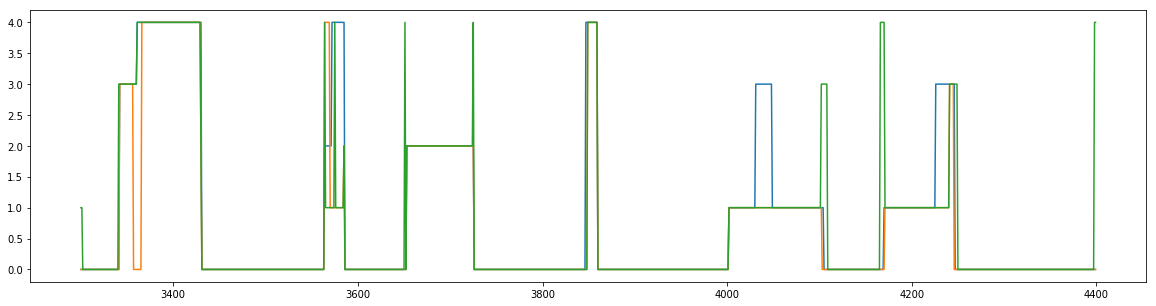

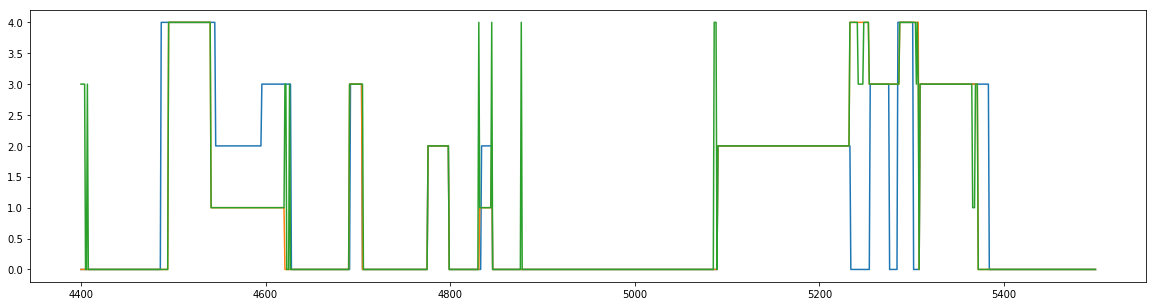

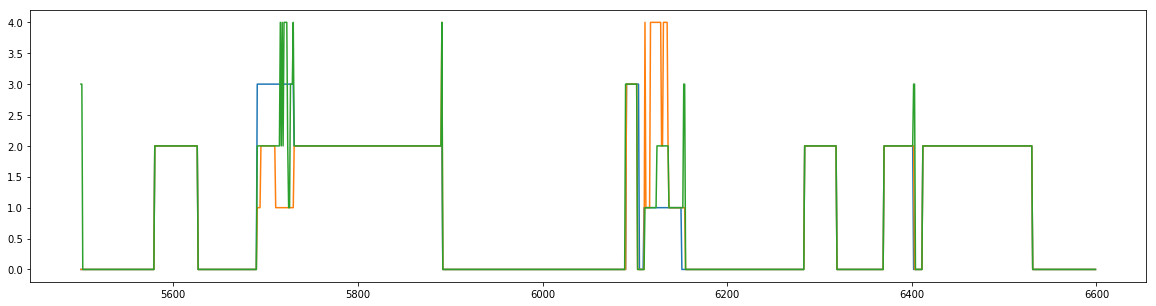

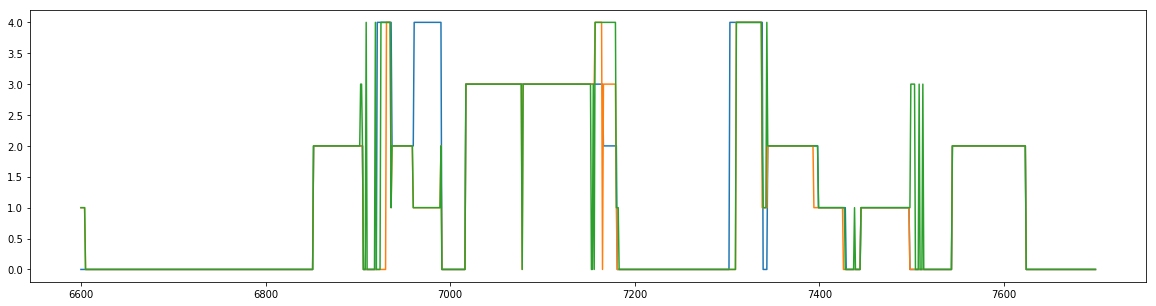

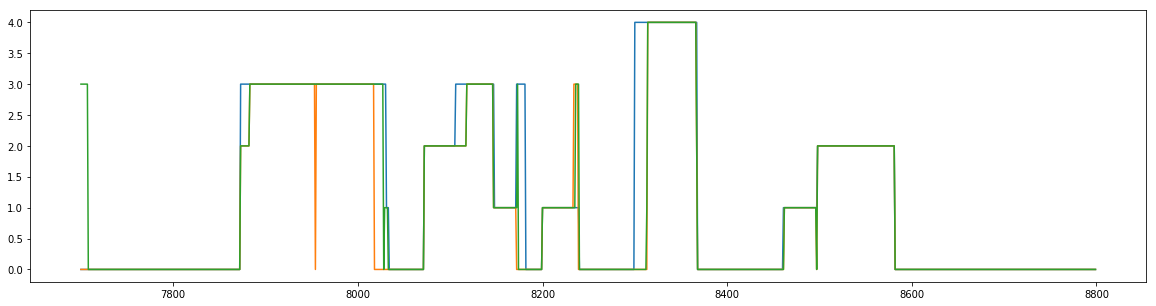

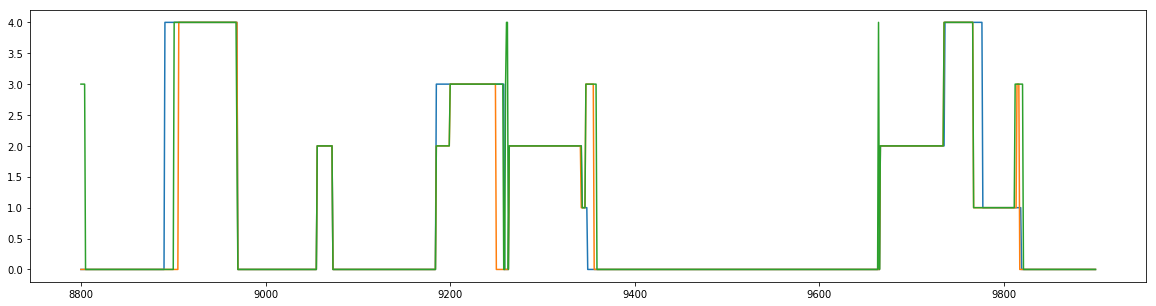

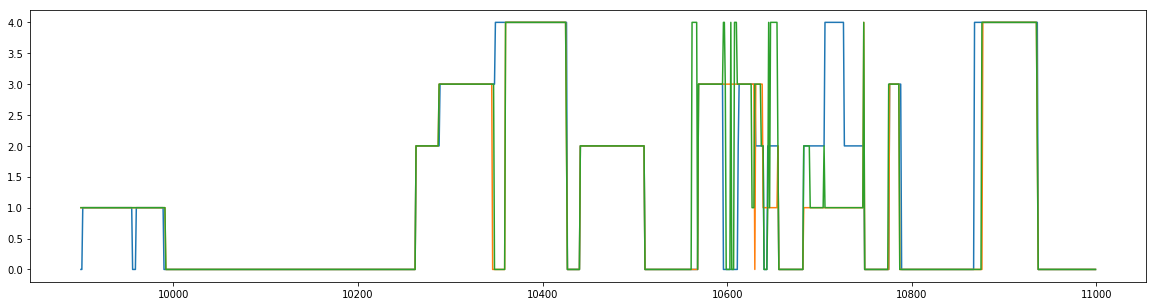

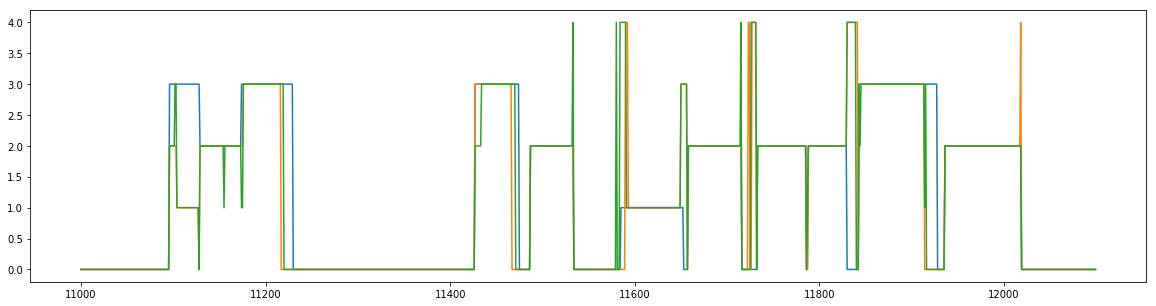

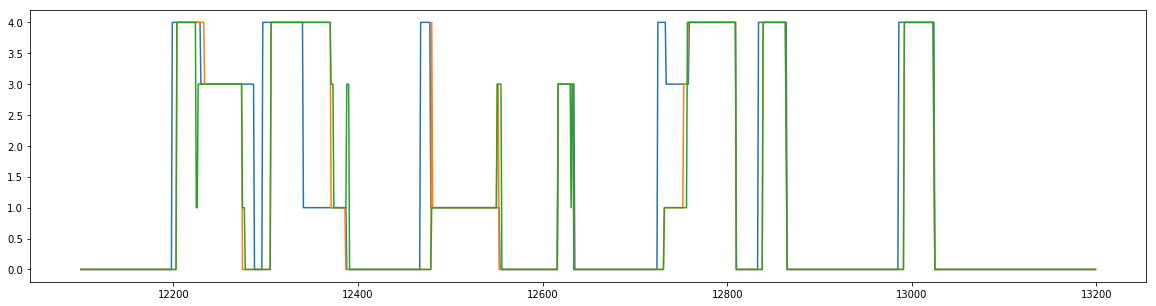

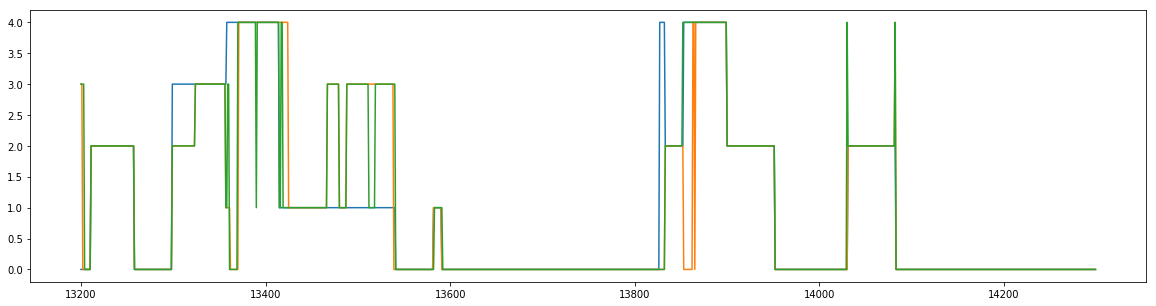

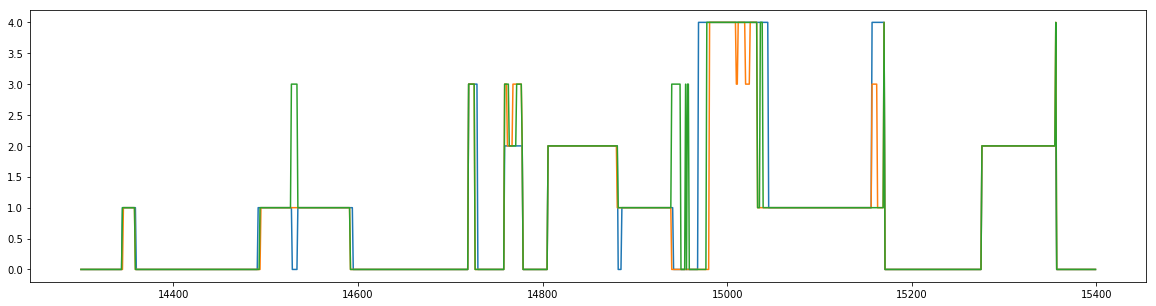

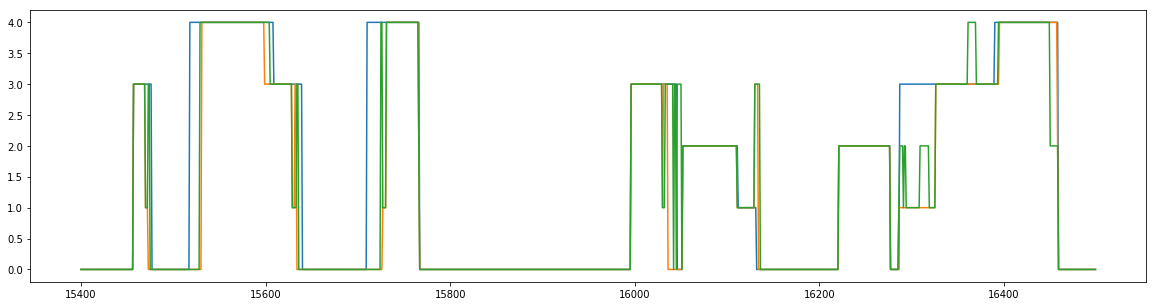

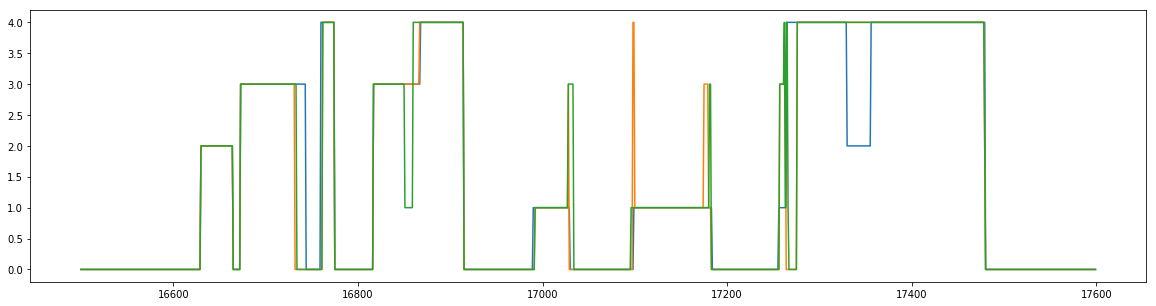

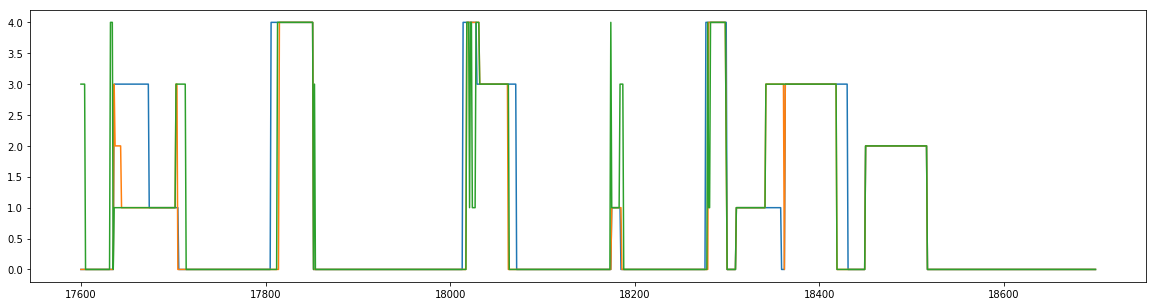

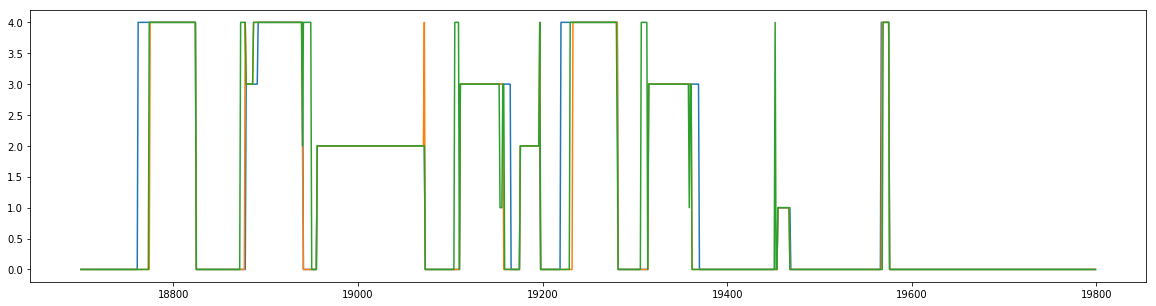

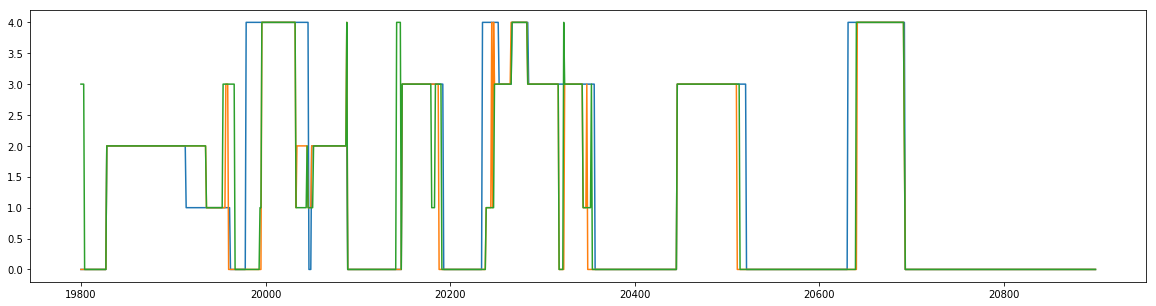

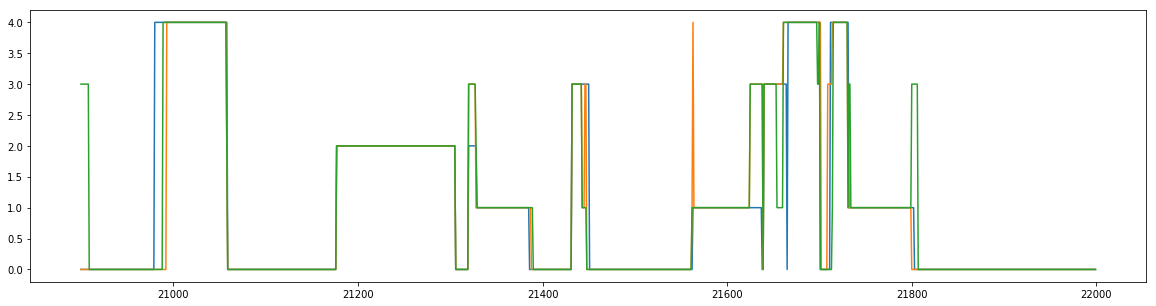

In [234]:
for j in data_transform_test.well_id.unique()[0:20]:
    well_small = data_transform_test[data_transform_test.well_id==j]
    plt.figure(figsize=(20,5))
    plt.plot(well_small.index.values,well_small.label.values)
    plt.plot(well_small.index.values,well_small.label_pred.values)
    plt.plot(well_small.index.values, well_small.label_pred_mean.values)

    plt.show()


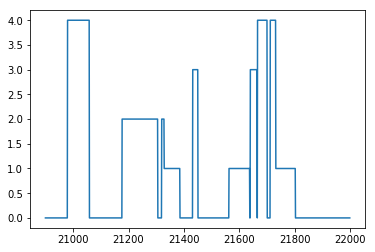

In [77]:
    plt.plot(well_small.index.values,well_small.label.values)


In [78]:
testDF = pd.read_csv('test_lofi_rowid_Nov13.csv')

In [79]:
list_well_test_final = []
for well_id in testDF.well_id.unique():
    print(well_id)
    data_well = testDF[testDF.well_id==well_id]
    data_well.reset_index(inplace=True)

    for penalty_value in  penalty_value_list:
        list_cpts, nb_cpts = algo_changepoints.np_pelt(data_well[['GR']], penalty_value, min_segment_size, nquantiles, method = model)
        list_cpts_all = np.append(list_cpts,0)[::-1]

        data_well['seg_'+str(penalty_value)]=0
        for j in range(nb_cpts):
            data_well.loc[list_cpts_all[j]:list_cpts_all[j+1],'seg_'+str(penalty_value)]=j
        data_well['GR_mean_'+str(penalty_value)]=data_well.groupby('seg_'+str(penalty_value)).transform('mean')['GR']
        data_well['GR_std_'+str(penalty_value)]=data_well.groupby('seg_'+str(penalty_value)).transform('std')['GR']
        data_well['GR_skew_'+str(penalty_value)]=data_well.groupby('seg_'+str(penalty_value)).transform('skew')['GR']
        data_well['GR_kurtosis_'+str(penalty_value)]=data_well.groupby('seg_'+str(penalty_value)).transform(kurtosis)['GR']
        data_well['GR_max_'+str(penalty_value)]=data_well.groupby('seg_'+str(penalty_value)).transform('max')['GR']
        data_well['GR_min_'+str(penalty_value)]=data_well.groupby('seg_'+str(penalty_value)).transform('min')['GR']

        data_well = data_well.groupby('seg_'+str(penalty_value)).apply(lambda x:compute_regression(x,penalty_value))
    list_well_test_final.append(data_well)

5000


c:\users\brunedv\documents\github\changepoint_cython\pychangepoints\algo_changepoints.py:17: FutureWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated

C:\Users\brunedv\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\brunedv\Anaconda3\lib\site-packages\pandas\core\indexing.py:480: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_gu

5001
5002
5003
5004
5005
5006
5007
5008
5009
5010
5011
5012
5013
5014
5015
5016
5017
5018
5019
5020
5021
5022
5023
5024
5025
5026
5027
5028
5029
5030
5031
5032
5033
5034
5035
5036
5037
5038
5039
5040
5041
5042
5043
5044
5045
5046
5047
5048
5049
5050
5051
5052
5053
5054
5055
5056
5057
5058
5059
5060
5061
5062
5063
5064
5065
5066
5067
5068
5069
5070
5071
5072
5073
5074
5075
5076
5077
5078
5079
5080
5081
5082
5083
5084
5085
5086
5087
5088
5089
5090
5091
5092
5093
5094
5095
5096
5097
5098
5099
5100
5101
5102
5103
5104
5105
5106
5107
5108
5109
5110
5111
5112
5113
5114
5115
5116
5117
5118
5119
5120
5121
5122
5123
5124
5125
5126
5127
5128
5129
5130
5131
5132
5133
5134
5135
5136
5137
5138
5139
5140
5141
5142
5143
5144
5145
5146
5147
5148
5149
5150
5151
5152
5153
5154
5155
5156
5157
5158
5159
5160
5161
5162
5163
5164
5165
5166
5167
5168
5169
5170
5171
5172
5173
5174
5175
5176
5177
5178
5179
5180
5181
5182
5183
5184
5185
5186
5187
5188
5189
5190
5191
5192
5193
5194
5195
5196
5197
5198
5199
5200


In [80]:
data_eval = pd.concat(list_well_test_final,ignore_index=True)

In [81]:
X_final_eval = scaler.transform(data_eval[list_interest])
X_final_eval = data_eval[list_interest].values

In [82]:
X_final_eval

array([[ 9.01736580e-01,  1.33053568e+02,  3.50999497e+00, ...,
         1.13297804e+02,  0.00000000e+00,  1.34943504e+02],
       [ 9.01736580e-01,  1.33053568e+02,  3.50999497e+00, ...,
         1.13297804e+02,  1.75438596e-02,  1.27004675e+02],
       [ 9.01736580e-01,  1.33053568e+02,  3.50999497e+00, ...,
         1.13297804e+02,  3.50877193e-02,  1.33159255e+02],
       ...,
       [-9.77117060e-01,  1.28963039e+02,  6.73688005e+00, ...,
         5.90092197e+01,  9.60526316e-01,  1.26124399e+02],
       [-9.77117060e-01,  1.28963039e+02,  6.73688005e+00, ...,
         5.90092197e+01,  9.73684211e-01,  1.17591583e+02],
       [-9.77117060e-01,  1.28963039e+02,  6.73688005e+00, ...,
         5.90092197e+01,  9.86842105e-01,  1.32555150e+02]])

In [83]:
list_interest

['slope_1',
 'GR_mean_1',
 'GR_std_1',
 'GR_skew_1',
 'GR_kurtosis_1',
 'quantile_10_1',
 'quantile_90_1',
 'GR_max_1',
 'GR_min_1',
 'position_1',
 'slope_10',
 'GR_mean_10',
 'GR_std_10',
 'GR_skew_10',
 'GR_kurtosis_10',
 'quantile_10_10',
 'quantile_90_10',
 'GR_max_10',
 'GR_min_10',
 'position_10',
 'slope_20',
 'GR_mean_20',
 'GR_std_20',
 'GR_skew_20',
 'GR_kurtosis_20',
 'quantile_10_20',
 'quantile_90_20',
 'GR_max_20',
 'GR_min_20',
 'position_20',
 'slope_40',
 'GR_mean_40',
 'GR_std_40',
 'GR_skew_40',
 'GR_kurtosis_40',
 'quantile_10_40',
 'quantile_90_40',
 'GR_max_40',
 'GR_min_40',
 'position_40',
 'GR']

In [84]:
y_pred_val_final = clf.predict(X_final_eval)

In [85]:
testDF["label"] = y_pred_val_final
testDF[["row_id","well_id","label"]].to_csv("submission.csv",index =False)

In [86]:
lgb


<module 'lightgbm' from 'C:\\Users\\brunedv\\Anaconda3\\lib\\site-packages\\lightgbm\\__init__.py'>